<a href="https://colab.research.google.com/github/hkhajgiwale/Deep-Learning-ImageNett/blob/master/Deep_Learining_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [ ]:
print(tf.__version__)

2.4.0


In [ ]:
# dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"
# data_dir = tf.keras.utils.get_file(origin=dataset_url, 
#                                    fname='imagenette2-160', 
#                                    untar=True)

In [ ]:
(train_datasets, validation_ds), metadata = tfds.load(
    'imagenette/160px-v2',
    split=['train','validation'],
    with_info=True,
    as_supervised=True
)

In [ ]:
len(train_datasets)

9469

In [ ]:
len(validation_ds)

3925

In [ ]:
df_train = tfds.as_dataframe(tfds.load('imagenette/160px-v2',split='train'))
len(df_train)

9469

For class label :  0


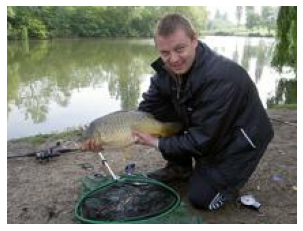

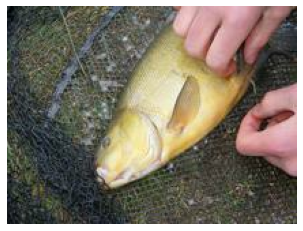

For class label :  1


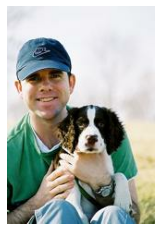

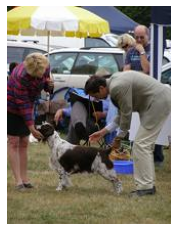

For class label :  2


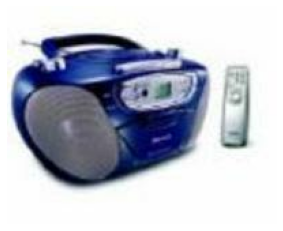

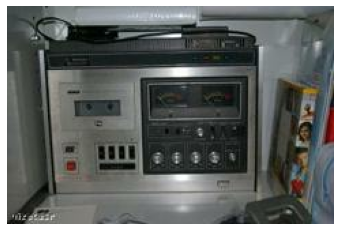

For class label :  3


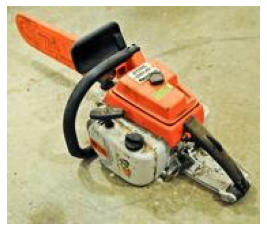

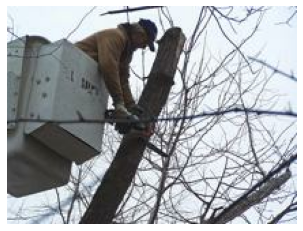

For class label :  4


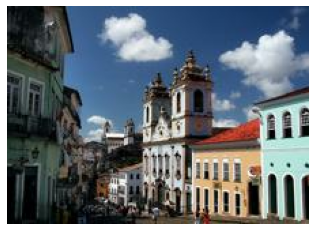

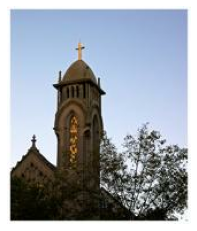

For class label :  5


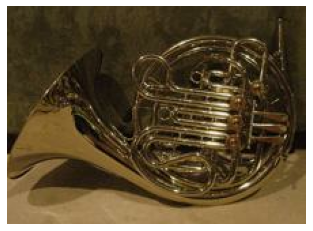

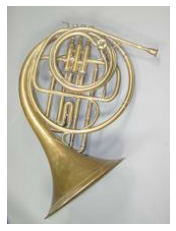

For class label :  6


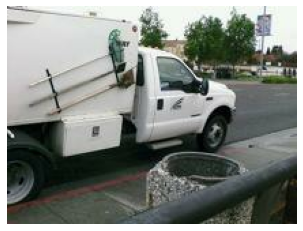

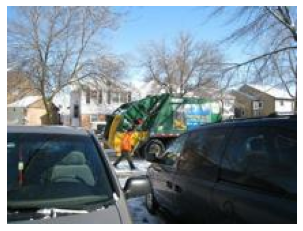

For class label :  7


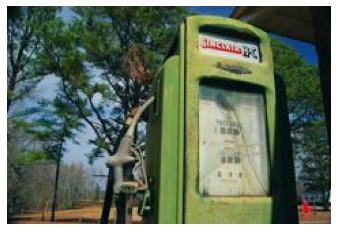

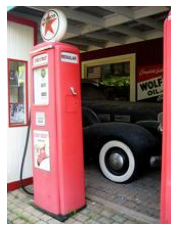

For class label :  8


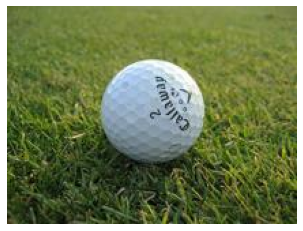

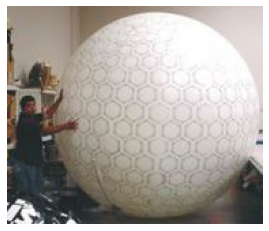

For class label :  9


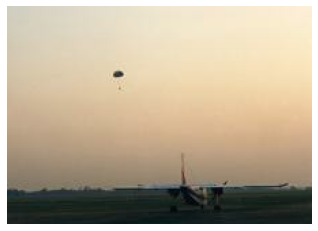

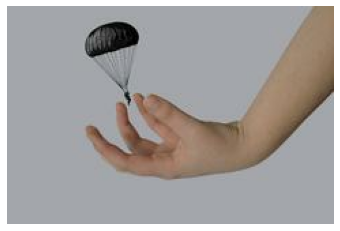

In [ ]:
df_train = tfds.as_dataframe(tfds.load('imagenette/160px-v2',split='train'))
label = np.sort(df_train['label'].unique())
df_train.set_index('label', inplace=True)
for l in label:
  print("For class label : ",l)
  for index,rows in df_train.loc[l].head(2).iterrows():
   plt.imshow(rows['image'])
   plt.axis(False)
   plt.show()

In [ ]:
!pip install tensorflow-gpu==2.4.0

     |████████████████████████████████| 394.7MB 40kB/s 


In [ ]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

#Training Path
train_data_dir = pathlib.Path( str(data_dir) + "/train")
print(train_data_dir)

#Validation Path
validation_data_dir = pathlib.Path(str(data_dir) + "/val")
print(validation_data_dir)

/root/.keras/datasets/imagenette2-160
/root/.keras/datasets/imagenette2-160/train
/root/.keras/datasets/imagenette2-160/val


In [ ]:
batch_size = 32
img_height = 160
img_width = 160

In [ ]:
import os
os.chdir("/root/.keras/datasets/imagenette2-160/")
!ls

noisy_imagenette.csv  train  val


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9469 files belonging to 10 classes.
Using 7576 files for training.


In [ ]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3925 files belonging to 10 classes.
Using 785 files for validation.


In [ ]:
train_class_names = train_ds.class_names
print(train_class_names)

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


In [ ]:
validation_class_names = validation_ds.class_names
print(validation_class_names)

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


In [ ]:
train_image, train_label = train_ds.as_numpy_iterator().next()
validation_image, validation_label = validation_ds.as_numpy_iterator().next()
train_image.shape

(32, 160, 160, 3)

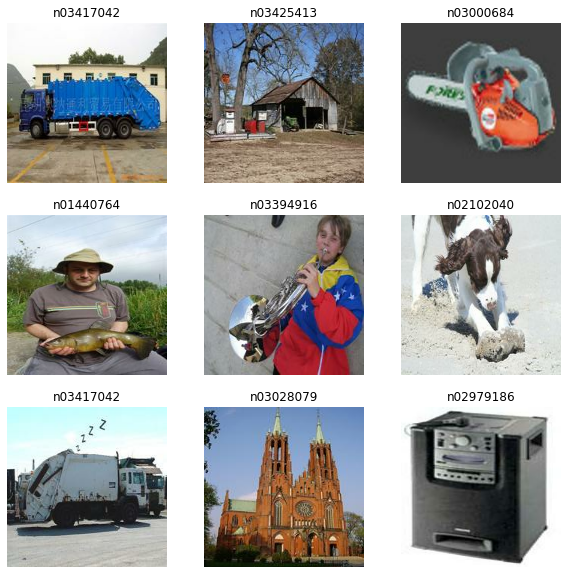

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 10

In [ ]:
model_convo2d = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_convo2d.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history_convo2d = model_convo2d.fit(
  train_ds,
  validation_data = validation_ds,
  epochs=10
)

Epoch 1/10
 18/237 [=>............................] - ETA: 3:23 - loss: 2.3725 - accuracy: 0.1345

KeyboardInterrupt: ignored

In [ ]:
model_convo2d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

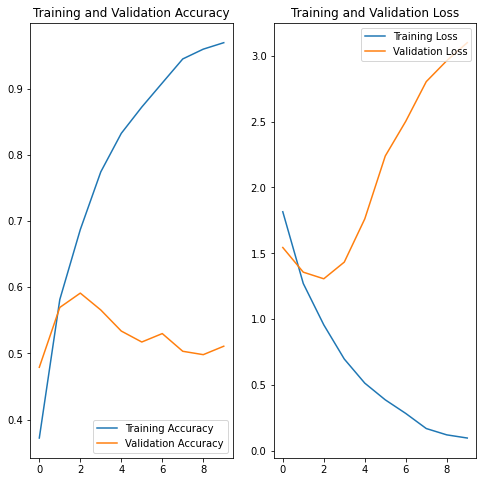

In [ ]:
##Visualisation
epochs = 10
acc = history_convo2d.history['accuracy']
val_acc = history_convo2d.history['val_accuracy']

loss = history_convo2d.history['loss']
val_loss = history_convo2d.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, acc = model_convo2d.evaluate(validation_ds)
print("Accuracy: ", acc)
print("Loss: ", loss)

25/25 [==============================] - 6s 233ms/step - loss: 3.0988 - accuracy: 0.5108
Accuracy:  0.5108280181884766
Loss:  3.098784923553467


**Data Augementation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal")
    #layers.experimental.preprocessing.RandomRotation(0.2)
  ]
)

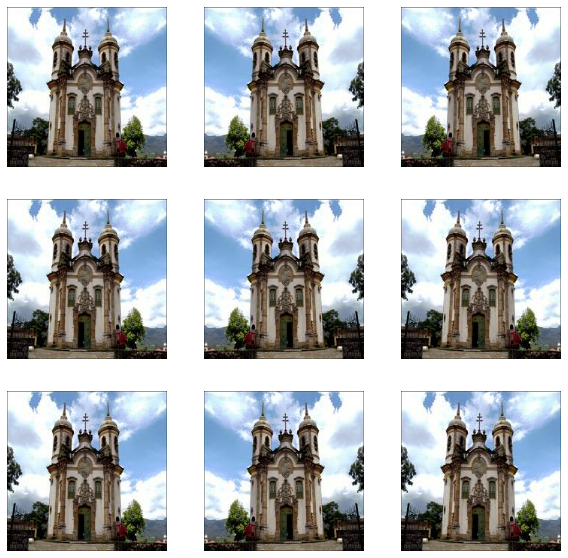

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Applying L2 regularisation and Dropout


In [ ]:
l2_model_plain = Sequential([         
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Flatten(),
  layers.Dense(140, kernel_regularizer=l2(0.0001), activation="relu"),
  layers.Dense(140, kernel_regularizer=l2(0.0001), activation="relu"),
  layers.Dense(140, kernel_regularizer=l2(0.0001), activation="relu"),
  #layers.Dropout(0.1),
  layers.Dense(num_classes, activation = "softmax")
])

In [ ]:
l2_model_plain.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [ ]:
l2_history_plain = l2_model_plain.fit(
    train_ds,
    validation_data = validation_ds,
    epochs=12,
    shuffle=True,
    batch_size=32
)

Epoch 1/12
237/237 [==============================] - 29s 120ms/step - loss: 1.6484 - accuracy: 0.4725 - val_loss: 2.1147 - val_accuracy: 0.3567
Epoch 2/12
237/237 [==============================] - 27s 113ms/step - loss: 1.6625 - accuracy: 0.4673 - val_loss: 2.0952 - val_accuracy: 0.3656
Epoch 3/12
237/237 [==============================] - 27s 113ms/step - loss: 1.7196 - accuracy: 0.4443 - val_loss: 2.0893 - val_accuracy: 0.3185
Epoch 4/12
237/237 [==============================] - 26s 111ms/step - loss: 1.7627 - accuracy: 0.4329 - val_loss: 2.1102 - val_accuracy: 0.3185
Epoch 5/12
237/237 [==============================] - 26s 112ms/step - loss: 1.7273 - accuracy: 0.4444 - val_loss: 2.1123 - val_accuracy: 0.3223
Epoch 6/12
237/237 [==============================] - 26s 111ms/step - loss: 1.7156 - accuracy: 0.4430 - val_loss: 2.1391 - val_accuracy: 0.3325
Epoch 7/12
237/237 [==============================] - 26s 111ms/step - loss: 1.6805 - accuracy: 0.4583 - val_loss: 2.1180 - val_ac

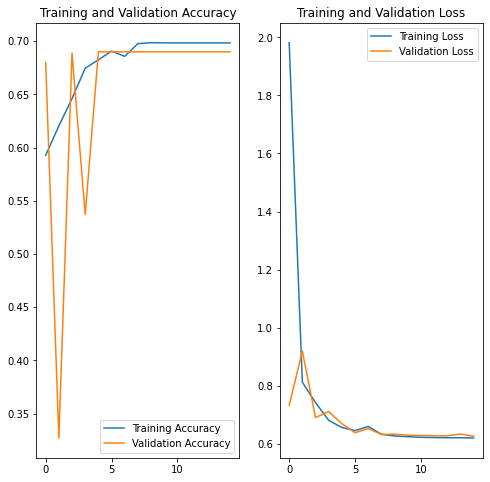

In [ ]:
##Visualisation
epochs = 15
acc = l2_history_plain.history['accuracy']
val_acc = l2_history_plain.history['val_accuracy']

loss = l2_history_plain.history['loss']
val_loss = l2_history_plain.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
plain_loss, plain_acc = l2_model_plain.evaluate(validation_ds)
print("Accuracy: ", plain_acc)
print("Loss: ", plain_loss)

25/25 [==============================] - 1s 30ms/step - loss: 2.0628 - accuracy: 0.3197
Accuracy:  0.3197452127933502
Loss:  2.0628364086151123


Prediction

In [ ]:
validation_prediction = np.argmax(l2_model_plain.predict(validation_image),axis=1)

In [ ]:
validation_label

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
validation_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

print(classification_report(validation_label,validation_prediction))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        20
           1       0.00      0.00      0.00        12

    accuracy                           0.62        32
   macro avg       0.31      0.50      0.38        32
weighted avg       0.39      0.62      0.48        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

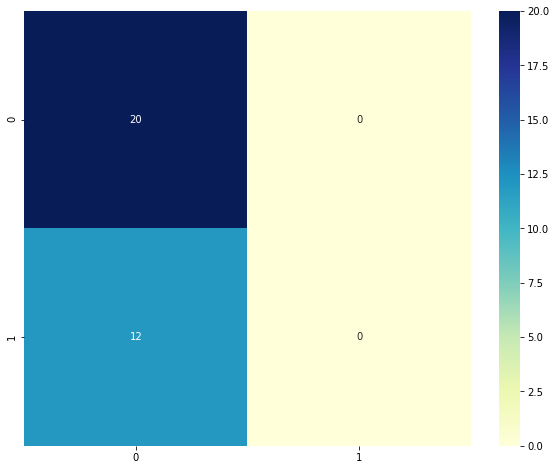

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(validation_label,validation_prediction)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="YlGnBu");

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    height_shift_range=25)
img_aug,lbl_aug = datagen.flow(train_image, train_label, batch_size=batch_size).next()

In [ ]:
model_a = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Flatten(),
  layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001)),
  layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001)),
  layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001)),
  layers.Dropout(0.1),
  layers.Dense(num_classes,activation='softmax')
])
model_a.compile(
  optimizer='Adam',
  loss=tf.losses.sparse_categorical_crossentropy,
  metrics=['accuracy'])

In [ ]:
history_a = model_a.fit(
  img_aug,lbl_aug,batch_size=64,
  validation_split=0.1,
  shuffle=True,
  epochs=12
)

Epoch 1/12
1/1 [==============================] - 1s 564ms/step - loss: 3.0550 - accuracy: 0.7500 - val_loss: 10.9846 - val_accuracy: 0.7500
Epoch 2/12
1/1 [==============================] - 0s 245ms/step - loss: 2.9772 - accuracy: 0.7857 - val_loss: 10.1576 - val_accuracy: 0.7500
Epoch 3/12
1/1 [==============================] - 0s 187ms/step - loss: 0.9274 - accuracy: 0.8571 - val_loss: 6.9430 - val_accuracy: 0.7500
Epoch 4/12
1/1 [==============================] - 0s 182ms/step - loss: 1.9725 - accuracy: 0.8571 - val_loss: 7.1361 - val_accuracy: 0.7500
Epoch 5/12
1/1 [==============================] - 0s 178ms/step - loss: 0.2783 - accuracy: 0.9643 - val_loss: 8.2412 - val_accuracy: 0.7500
Epoch 6/12
1/1 [==============================] - 0s 185ms/step - loss: 1.0310 - accuracy: 0.8571 - val_loss: 10.3512 - val_accuracy: 0.7500
Epoch 7/12
1/1 [==============================] - 0s 195ms/step - loss: 0.8894 - accuracy: 0.8214 - val_loss: 14.7044 - val_accuracy: 0.7500
Epoch 8/12
1/1 [

In [ ]:
loss, acc = model_a.evaluate(validation_ds)
print("Accuracy: ", acc)
print("Loss: ", loss)

81/81 [==============================] - 4s 43ms/step - loss: 7.1384 - accuracy: 0.6900
Accuracy:  0.6899613738059998
Loss:  7.13842248916626


In [ ]:
model1 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Flatten(),
  layers.Dense(30, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.00001)),
  layers.Dropout(0.1),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model1.compile(
  optimizer='Adam',
  loss=tf.losses.sparse_categorical_crossentropy,
  metrics=['accuracy'])

In [ ]:
model1.fit(
  train_image,train_label,batch_size=64,
  validation_split=0.1,
  shuffle=True,
  epochs=12
)

In [ ]:
loss, acc = model1.evaluate(validation_ds)
print("Accuracy: ", acc)
print("Loss: ", loss)

81/81 [==============================] - 2s 22ms/step - loss: 39.6340 - accuracy: 0.6900
Accuracy:  0.6899613738059998
Loss:  39.63404083251953


In [ ]:
model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(120, activation='relu'),
  layers.Dense(120, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model2.compile(
  optimizer='Adam',
  loss=tf.losses.sparse_categorical_crossentropy,
  metrics=['accuracy'])

In [ ]:
model2.fit(
  train_image,train_label,batch_size=64,
  validation_split=0.1,
  shuffle=True,
  epochs=12
)

Epoch 1/12
1/1 [==============================] - 1s 940ms/step - loss: 0.5870 - accuracy: 0.7857 - val_loss: 72.1144 - val_accuracy: 0.5000
Epoch 2/12
1/1 [==============================] - 0s 166ms/step - loss: 15.9915 - accuracy: 0.8571 - val_loss: 47.6152 - val_accuracy: 0.5000
Epoch 3/12
1/1 [==============================] - 0s 157ms/step - loss: 10.7129 - accuracy: 0.8571 - val_loss: 7.8759 - val_accuracy: 0.5000
Epoch 4/12
1/1 [==============================] - 0s 155ms/step - loss: 2.9898 - accuracy: 0.6429 - val_loss: 21.9084 - val_accuracy: 0.5000
Epoch 5/12
1/1 [==============================] - 0s 171ms/step - loss: 3.1001 - accuracy: 0.8571 - val_loss: 2.1991 - val_accuracy: 0.5000
Epoch 6/12
1/1 [==============================] - 0s 162ms/step - loss: 2.4656 - accuracy: 0.6429 - val_loss: 31.7849 - val_accuracy: 0.5000
Epoch 7/12
1/1 [==============================] - 0s 153ms/step - loss: 3.0244 - accuracy: 0.8929 - val_loss: 39.9622 - val_accuracy: 0.5000
Epoch 8/12
1/

In [ ]:
loss, acc = model2.evaluate(validation_ds)
print("Accuracy: ", acc)
print("Loss: ", loss)

81/81 [==============================] - 2s 22ms/step - loss: 17.5319 - accuracy: 0.6900
Accuracy:  0.6899613738059998
Loss:  17.531858444213867
